## 機器學習 HW1 Data Preprocessing(diamonds.csv)

- 學號: 311706017
- 姓名: 陳詩婷



### Dataset:  

這一份檔案主要做diamonds.csv的前處理，此資料集的特徵共有：
- carat: 數值
- cut: 類別
- color: 類別
- clarity: 類別
- depth: 數值
- table: 數值
- price: 是<b>預測目標(label)</b>, 為數值
- x: 數值
- y: 數值
- z: 數值

In [34]:
import pandas as pd
df = pd.read_csv('daimonds.csv')  #匯入資料，告訴pd.read_csv要匯入的檔案的路徑，這邊我把檔案和ipynb放在同一目錄之下
df

,Unnamed: 0.1,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1,0.23,NaN,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,1,2,0.21,Premium,E,SI1,59.8,NaN,326.0,3.89,3.84,2.31
2,2,3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,3,4,0.29,Premium,I,NaN,62.4,58.0,334.0,4.20,NaN,2.63
4,4,5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53936,53937,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


- 資料量: 53940
- 特徵數:9 (price是label)
- 可以發現空值會顯示NaN，所以下一步就需要填補空值

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  53940 non-null  int64  
 1   Unnamed: 0    53940 non-null  int64  
 2   carat         52947 non-null  float64
 3   cut           52951 non-null  object 
 4   color         52948 non-null  object 
 5   clarity       52945 non-null  object 
 6   depth         52950 non-null  float64
 7   table         52947 non-null  float64
 8   price         52948 non-null  float64
 9   x             52949 non-null  float64
 10  y             52943 non-null  float64
 11  z             52948 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.9+ MB


<hr/>

### 前處理步驟: 
1) 觀察資料分布，填補空值

2) 處理類別不平衡問題 

3) Feature Selection 

4) 存檔，作業需繳交 .xlsx 下一次要用到 .csv 

<hr/>

# 1. 填補空值

### 1-1. 刪除無法填補的資料

檢查每一個特徵是否有缺失值，發現有缺失值

In [36]:
df.isnull().sum()  

Unnamed: 0.1      0
Unnamed: 0        0
carat           993
cut             989
color           992
clarity         995
depth           990
table           993
price           992
x               991
y               997
z               992
dtype: int64

為避免資料失真，刪去缺失過多特徵的資料，這裡設門檻為0.2，共有10個特徵故超過2個特徵的欄位為空就移除該筆資料

In [37]:
def drop_nan_checking(df, thrshold):  # 參數: 資料, 判斷該筆資料去留的門檻值
       
    drop_row = []
    for row in range(len(df)):  # 前兩行是index

        nullCount = df.loc[row].isnull().sum() / 10  # 計算特徵的缺失比例，若高於我們預設的門檻就較失真 --> 刪除這筆資料 (應該可以不要寫死)
        if nullCount > thrshold:
            drop_row.append(row)
    return drop_row


drop_row = drop_nan_checking(df, 0.2)
df.drop(drop_row, axis=0,inplace=True)     

#print("drop: ", drop_row)

drop:  [2713, 5431, 11154, 13945, 14692, 15801, 20685, 20927, 22745, 23155, 24092, 26462, 27739, 30114, 30229, 31759, 32084, 32652, 32851, 33780, 35654, 37417, 38033, 38053, 38144, 39699, 42418, 43383, 43651, 47724, 49018, 51305]


刪去price欄位缺失的資料，因為price是label

In [38]:
df = df.dropna(subset=['price'], how='all') # 刪去沒有y值的資料

### 1-2. 填補資料

以平均值填補數值型態資料

In [39]:
#如果欄位有出現空值(且該筆資料缺少的特徵少於二成)，就進行填補

df.fillna(df.mean(), inplace=True) #(其實是不用迴圈就全部填好了  )

C:\Users\Tina_New\AppData\Local\Temp\ipykernel_10416\4206611898.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True) #其實是不用迴圈就全部填好了
C:\Users\Tina_New\AppData\Local\Temp\ipykernel_10416\4206611898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mean(), inplace=True) #其實是不用迴圈就全部填好了


以數量最多的那個類，填補類別型態的空缺處

In [40]:
# mode可以找到眾數，會回傳一個series
# https://blog.csdn.net/qq_42419025/article/details/106079465

# cut
freq_cut = df['cut'].mode()[0]
df['cut'].fillna(freq_cut, inplace=True)
# print(freq_cut)

# color
freq_color = df['color'].mode()[0]
df['color'].fillna(freq_color, inplace=True)
# print(freq_color)

# clarity
freq_clarity = df['clarity'].mode()[0]
df['clarity'].fillna(freq_clarity, inplace=True)
# print(freq_clarity)


C:\Users\Tina_New\AppData\Local\Temp\ipykernel_10416\1782433359.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'].fillna(freq_cut, inplace=True)
C:\Users\Tina_New\AppData\Local\Temp\ipykernel_10416\1782433359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'].fillna(freq_color, inplace=True)
C:\Users\Tina_New\AppData\Local\Temp\ipykernel_10416\1782433359.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

重新觀察資料，檢查是否仍有空值

In [41]:
df.isnull().sum()  

Unnamed: 0.1    0
Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth           0
table           0
price           0
x               0
y               0
z               0
dtype: int64

<hr/>

# 2. 回歸平衡
- LDS

# 3. 特徵選取
- 模型在訓練時採用太多特徵會增加運算的負擔，也可能讓模型overfitting而不泛化，因此需要做特徵選取

### 3a. Filter
- 透過Pearson 相關係數，觀察X對於Y是否顯著
- 由於下一步要做的逐步回歸是相當耗能的，先以filter排除「與label相關性過低的特徵」
- 若特徵之間具共線性，擇一即可

> 與其他特徵有相關: carat, x

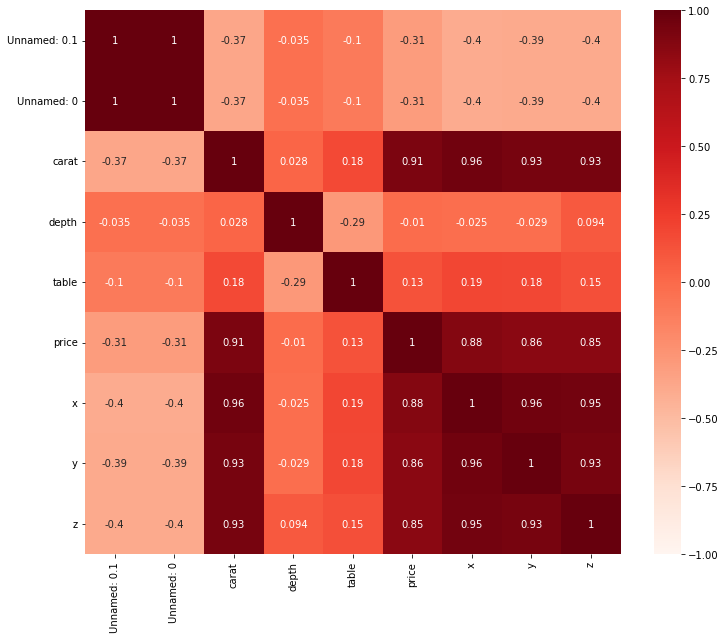

In [42]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

featuresCorr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(featuresCorr, annot=True, cmap=plt.cm.Reds, vmax=1, vmin=-1)
plt.show()

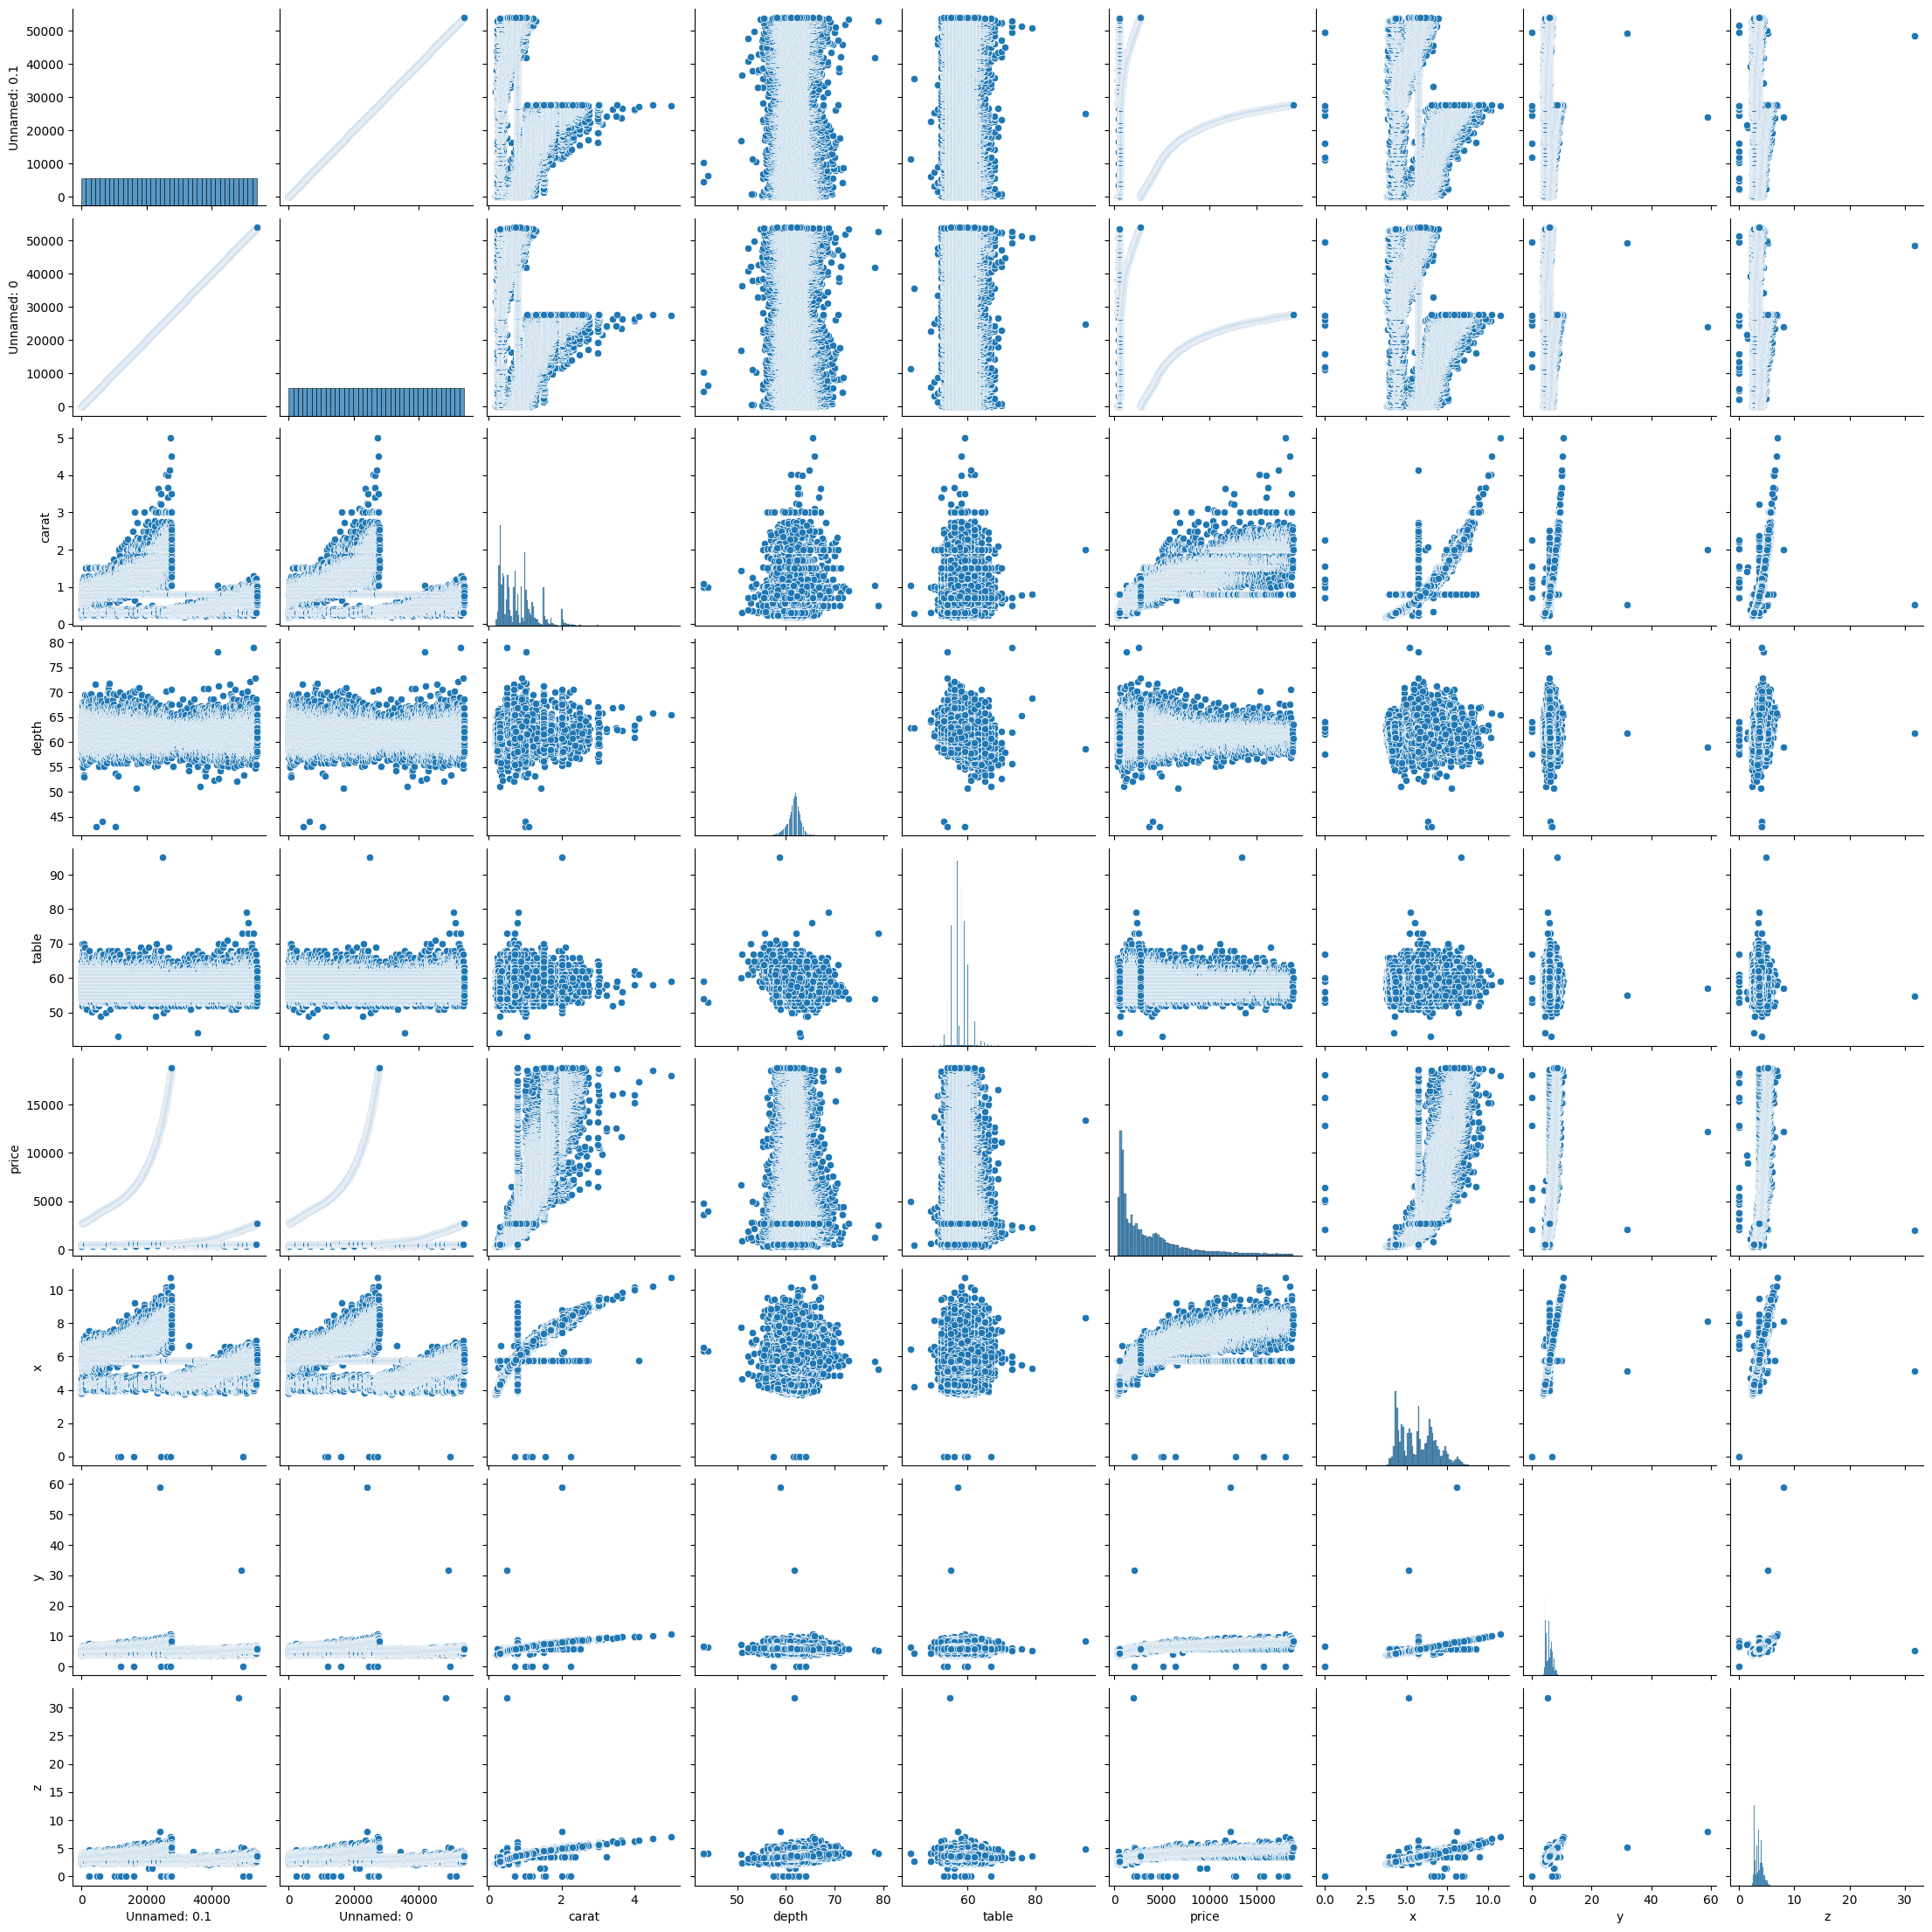

In [10]:
import seaborn as sns               #載入分布圖形套件
import matplotlib.pyplot as plt     #載入畫圖套件
            
#sns.pairplot(df)  #繪製特徵、標籤之間的分布圖
# (這張圖會跑很久所以註解掉)

看起來類別型態的特徵cut, clarify, color應該是顯著的，可以保留

In [43]:
# pip install statsmodels
# (實驗室的伺服器似乎裝不好這個模組，所以記得不要動下面的那一段) 
import statsmodels.api as sm
from statsmodels.formula.api import ols


# ANOVA ( cut
model = ols('price ~ cut', data=df).fit()
anova_cut = sm.stats.anova_lm(model, typ=2)
print(anova_cut)

# ANOVA ( clarity
model = ols('price ~ clarity', data=df).fit()
anova_clarity = sm.stats.anova_lm(model, typ=2)
print(anova_clarity)

# ANOVA ( color
model = ols('price ~ color', data=df).fit()
anova_color = sm.stats.anova_lm(model, typ=2)
print(anova_color)

                sum_sq       df           F         PR(>F)
cut       1.033932e+10      4.0  164.498051  3.257822e-140
Residual  8.315708e+11  52921.0         NaN            NaN
                sum_sq       df           F         PR(>F)
clarity   2.193150e+10      7.0  202.195406  1.866668e-297
Residual  8.199786e+11  52918.0         NaN            NaN
                sum_sq       df           F  PR(>F)
color     2.591087e+10      6.0  280.060953     0.0
Residual  8.159992e+11  52919.0         NaN     NaN


### 3b. wrapper
- 使用逐步回歸(stepwise)
- 採用向後消除法: 逐一排除p-value低(與y相關性不高)的特徵，找出最適合預測y的特徵子集合
- 相當耗時，所以配合filter一起做


In [44]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
# https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922

X = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'price', 'cut','color','clarity'], axis=1) # feature
y = df["price"] # label
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=4)
sfs.fit(X, y)

C:\Users\Tina_New\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Tina_New\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Tina_New\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Tina_New\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Tina_New\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Tina_N

SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=4)

In [46]:
sfs.get_support()

array([ True, False, False,  True,  True,  True])

>刪去不顯著的幾個特徵：depth, table

In [47]:
df_cleaned = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'depth', 'table', 'carat', 'x'], axis=1)

## 前處理後的特徵量與資料量
- row: 資料量
- column: 特徵量

In [48]:
df_cleaned

,cut,color,clarity,price,y,z
0,Ideal,E,SI2,326.0,3.980000,2.43
1,Premium,E,SI1,326.0,3.840000,2.31
2,Good,E,VS1,327.0,4.070000,2.31
3,Premium,I,SI1,334.0,5.734659,2.63
4,Good,J,SI2,335.0,4.350000,2.75
...,...,...,...,...,...,...
53935,Ideal,D,SI1,2757.0,5.760000,3.50
53936,Good,D,SI1,2757.0,5.750000,3.61
53937,Very Good,D,SI1,2757.0,5.680000,3.56
53938,Premium,H,SI2,2757.0,6.120000,3.74


*經過前處理之後*

- 資料量: 53940=> 52926
- 特徵數: 9 => 5


## 匯出處理好的資料

In [51]:
df.to_excel('daimonds_cleaned.xlsx') 
df.to_csv('daimonds_cleaned.csv') 

## 作業要求

1) A brief report logically describes the algorithm, method, or thinking applied to address the above issues using PDF format.

2) Excel files.

3) Code: Please submit a PDF file and a source code with py. or .ipynb format.